In [2]:
import numpy as np

num_points = 2000
vectors_set = []

for i in range(num_points):
    if np.random.random() > 0.5:
        vectors_set.append([np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)])
    
    else:
        vectors_set.append([np.random.normal(3.0, 0.5), np.random.normal(1.0, 0.5)])

/home/tf_user/anaconda3/envs/tf/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


<function matplotlib.pyplot.show>

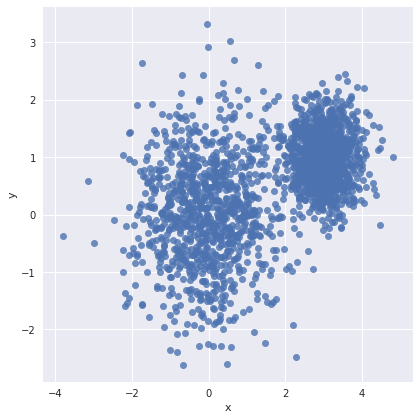

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.DataFrame({"x": [v[0] for v in vectors_set],
                   "y": [v[1] for v in vectors_set]})
sns.lmplot("x","y",data=df, fit_reg=False, size=6)
plt.show

/home/tf_user/anaconda3/envs/tf/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


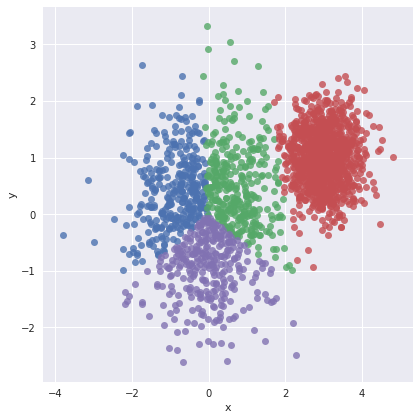

In [15]:
import tensorflow as tf

vectors = tf.constant(vectors_set)
k = 4
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors),[0,0],[k,-1]))

expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroides = tf.expand_dims(centroides, 1)

assignments = tf.argmin(tf.reduce_sum(tf.square(tf.subtract(expanded_vectors, expanded_centroides)), 2), 0)

# for c in range(k):
#     location = tf.where(tf.equal(assignments, c))
#     gather = tf.gather(vectors, tf.reshape(location, [1,-1]))
#     reduce_mean = tf.reduce_mean(gather, reduction_indices=[1])
# means = tf.concat([reduce_mean], 0)

means = tf.concat([tf.reduce_mean(tf.gather(vectors, tf.reshape(tf.where(tf.equal(assignments, c)), [1,-1])),
                                     reduction_indices=[1]) for c in range(k)], 0)

update_centroides = tf.assign(centroides, means)

init_op = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init_op)

centroid_values = sess.run(centroides)

for step in range(100):
    _, centroid_values, assignment_values = sess.run([update_centroides, centroides, assignments])
    
    
data = {"x":[], "y":[], "cluster": []}

for i in range(len(assignment_values)):
    data["x"].append(vectors_set[i][0])
    data["y"].append(vectors_set[i][1])
    data["cluster"].append(assignment_values[i])
    
df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df, fit_reg=False, size=6, hue="cluster", legend=False)
plt.show()